In [3]:
%matplotlib inline
import numpy as np
from datetime import datetime, timedelta
import h5py

import matplotlib as mpl

import sys, os
sys.path.append('/uufs/chpc.utah.edu/sys/pkg/python/2.7.3_rhel6/lib/python2.7/site-packages/')
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v2')
from BB_basemap.draw_maps import Basemap, draw_CONUS_HRRR_map, draw_ALASKA_cyl_map

In [4]:
lon = -87.87500
lat = 47.46694 

In [9]:
plus_minus_latlon = 1.75; barb_thin = 2;  arcgis_res = 2500; half_box = 35;  alpha = .5

In [12]:
m = Basemap(resolution='f',
            projection='cyl',
            area_thresh=1,
            llcrnrlon=lon-plus_minus_latlon, llcrnrlat=lat-plus_minus_latlon,
            urcrnrlon=lon+plus_minus_latlon, urcrnrlat=lat+plus_minus_latlon,)

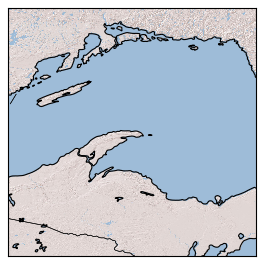

In [13]:
m.arcgisimage(service='World_Shaded_Relief', xpixels=arcgis_res, verbose=False)
m.drawcoastlines()
m.drawstates()